In [1]:
# first we need to import the libraries we're going to use
# 'import x as y' will import package x but give it the alias 'y' so you don't have to type out x all the time

import matplotlib.pyplot as plt # for making nice plots
import pandas as pd # for handling and transforming the data
import datetime # for manipulating dates, timestamps etc

%matplotlib inline

In [2]:
# we'll be using this file from now on! It's been through the process of cleaning and preparing
df = pd.read_csv("../data/cleaned.csv")

In [3]:
# want to get a feel for distributions of features and possible relationships

# to learn from this section: what features we may want to engineer in the next section
# e.g. bimodal - split in two bins

### Removing unrelated columns

In [4]:
# we know ahead of time that there are some columns that definitely won't be useful for classification
# these are the reference number, and probably the coordinates (latitude and longitude)
# we can drop these now

df = df.drop(columns=['latitude', 'longitude', 'reference_num'])
df.head(5)

,num_vehicles,accident_date,accident_time,road_class,road_surface,lighting,weather,casualty_class,casualty_severity,casualty_sex,casualty_age,vehicle_type
0,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,30,Car
1,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Female,20,Car
2,1,03-Oct-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,29,Car
3,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,17,Car
4,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,53,Goods vehicle 3.5 tonnes mgw and under


In [5]:
# we have a range of different columns left
# some are numerical, some are date/time-related, some are categorical, and some are binary

### Exploring binary columns

In [6]:
# let's look at a binary column - casualty sex. Does it matter? What can we tell from this data?

df.groupby(['casualty_severity', 'casualty_sex']).size()

# hint: men are the casualty in 58% of slight accidents but 70% of serious accidents
# this could be useful information! But we need to encode the binary column to 0 and 1, instead of string labels.

casualty_severity  casualty_sex
Serious            Female           655
                   Male            1537
Slight             Female          7038
                   Male            9653
dtype: int64

In [7]:
# encoding binary columns - there are two columns that can only have two values
# this means we can encode these as 0 and 1, instead of using string labels

binaryColumns = ['casualty_sex', 'casualty_severity']

# this function will return 1 if the value matches the specified 'positive' value
# e.g. encodeBinary('Male', 'Female') = 0, encodeBinary('Serious', 'Serious') = 1
def encodeBinary(positiveValue, value):
    return int(value == positiveValue)

# applying this function to our dataframe
df['is_male'] = [encodeBinary('Male', s) for s in df.casualty_sex]
df['is_serious'] = [encodeBinary('Serious', s) for s in df.casualty_severity]

# we can drop the old columns, now we have the binary versions
df = df.drop(columns = ['casualty_severity', 'casualty_sex'])

In [8]:
df.head(5)

,num_vehicles,accident_date,accident_time,road_class,road_surface,lighting,weather,casualty_class,casualty_age,vehicle_type,is_male,is_serious
0,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,30,Car,1,0
1,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,20,Car,0,0
2,1,03-Oct-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,29,Car,1,0
3,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,17,Car,1,0
4,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,53,Goods vehicle 3.5 tonnes mgw and under,1,0


### Part 2c - exploring numerical and datetime columns

(array([ 0.,  1.,  6., 13., 12., 13., 12., 17., 14., 16., 15., 31., 26.,
        30., 22., 22., 29., 46., 73., 68., 74., 54., 64., 60., 47., 38.,
        58., 36., 53., 43., 38., 23., 39., 28., 40., 31., 28., 35., 38.,
        33., 36., 32., 37., 32., 38., 36., 30., 36., 28., 27., 32., 21.,
        18., 24., 19., 19., 21., 14., 11., 13., 17., 17., 11., 18., 13.,
         9., 16., 14., 13.,  7., 11., 10.,  9.,  8., 11., 11.,  7., 10.,
        10., 12., 12., 13., 12., 12.,  7., 11., 14.,  4.,  1.,  6.,  3.,
         4.,  1.,  4.,  2.]),
 array([ 0.        ,  0.98947368,  1.97894737,  2.96842105,  3.95789474,
         4.94736842,  5.93684211,  6.92631579,  7.91578947,  8.90526316,
         9.89473684, 10.88421053, 11.87368421, 12.86315789, 13.85263158,
        14.84210526, 15.83157895, 16.82105263, 17.81052632, 18.8       ,
        19.78947368, 20.77894737, 21.76842105, 22.75789474, 23.74736842,
        24.73684211, 25.72631579, 26.71578947, 27.70526316, 28.69473684,
        29.68421053, 

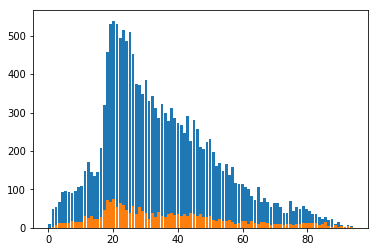

In [9]:
# numerical columns - are they useful? Do we want to do anything with them?

numericalColumns = ['num_vehicles', 'casualty_age']

slightAges = df[df.is_serious == 0]['casualty_age'].values
plt.hist(slightAges, range=(0,94),bins=95, rwidth=0.85)

seriousAges = df[df.is_serious == 1]['casualty_age'].values
plt.hist(seriousAges, range=(0,94),bins=95, rwidth=0.85)

In [10]:
# let's explore the date and time fields
# in their current format, they aren't very useful - we want to extract useful columns

monthMap = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 
            'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# write a function to take a date string of format DD-Mon-YY and extract the month as an integer
def getMonth(s):
    return monthMap[s.split('-')[1]]

# write a function to take a date string of format DD-Mon-YY and extract the full year as an integer
def getYear(s):
    return 2000 + int(s.split('-')[2])

# use these functions to add new columns to our dataframe
df['month'] = [getMonth(s) for s in df['accident_date']]
df['year'] = [getYear(s) for s in df['accident_date']]

df.head(5)

,num_vehicles,accident_date,accident_time,road_class,road_surface,lighting,weather,casualty_class,casualty_age,vehicle_type,is_male,is_serious,month,year
0,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,30,Car,1,0,3,2009
1,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,20,Car,0,0,3,2009
2,1,03-Oct-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,29,Car,1,0,10,2009
3,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,17,Car,1,0,11,2009
4,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,53,Goods vehicle 3.5 tonnes mgw and under,1,0,11,2009


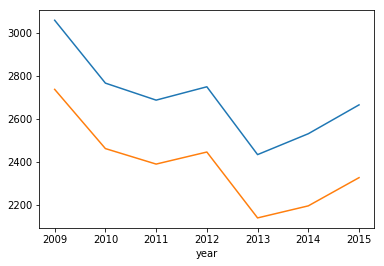

In [11]:
# does the year matter? let's have a look at the distribution of slight vs serious cases by year

allByYear = df.groupby('year')['year'].count()
slightByYear = df[df.is_serious == 0].groupby('year')['year'].count()
allByYear.plot()
slightByYear.plot()

# answer: year is probably not a good indicator of slight/serious
# can include if we want but not very useful

df = df.drop(columns=['year'])

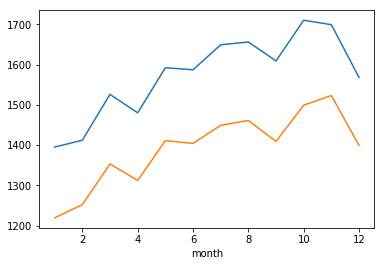

In [12]:
# what about month?

allByMonth = df.groupby('month')['month'].count()
slightByMonth = df[df.is_serious == 0].groupby('month')['month'].count()
allByMonth.plot()
slightByMonth.plot()

# what would we expect to tell from month? weather, light? we already have columns for this
# again, can probably leave out

df = df.drop(columns = ['month'])

In [13]:
df.head(5)

,num_vehicles,accident_date,accident_time,road_class,road_surface,lighting,weather,casualty_class,casualty_age,vehicle_type,is_male,is_serious
0,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,30,Car,1,0
1,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,20,Car,0,0
2,1,03-Oct-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,29,Car,1,0
3,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,17,Car,1,0
4,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,53,Goods vehicle 3.5 tonnes mgw and under,1,0


In [14]:
# what about weekday? we can get this information!

dayMap = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}

def getWeekday(s):
    month = getMonth(s)
    year = getYear(s)
    date = int(s.split('-')[0])
    dt = datetime.datetime(year, month, date)
    return dt.isoweekday()

df['weekday'] = [getWeekday(s) for s in df['accident_date']]

In [15]:
set(df.weekday.values)

{1, 2, 3, 4, 5, 6, 7}

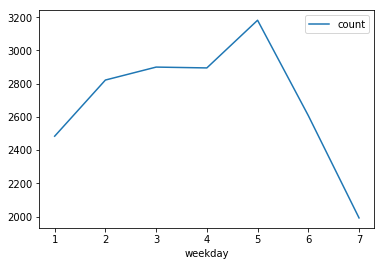

In [16]:
allByDay = df.groupby('weekday')['weekday'].agg(['count'])

allByDay.plot()

In [17]:
# write a function to take a 24hr HHMM time and get the hour as an int
# e.g. 1730 -> 17, 930 -> 9
# warning: leading zeros have been truncated, so 12.30am == 30
def getHour(n):
    s = str(n)
    if len(s) == 3:
        return int(s[0])
    elif len(s) == 2:
        return 0
    else:
        return int(s[0:2])
    
df['hour'] = [getHour(n) for n in df.accident_time]

In [18]:
df = df.drop(columns = ['accident_date', 'accident_time'])

### Exploring categorical columns

In [19]:
# categorical columns

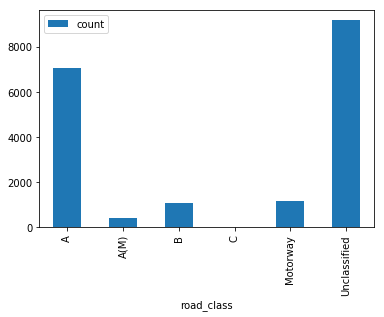

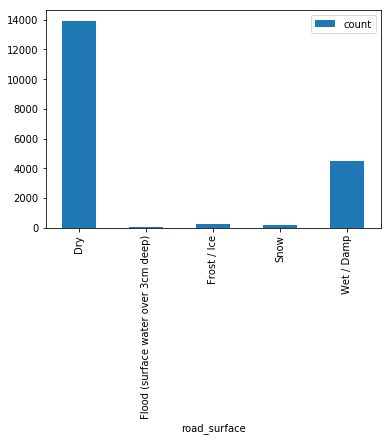

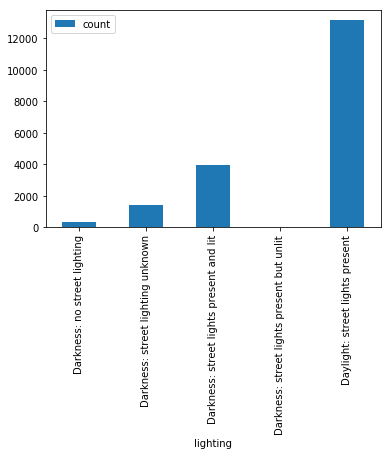

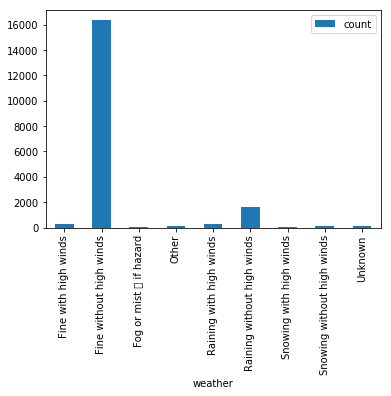

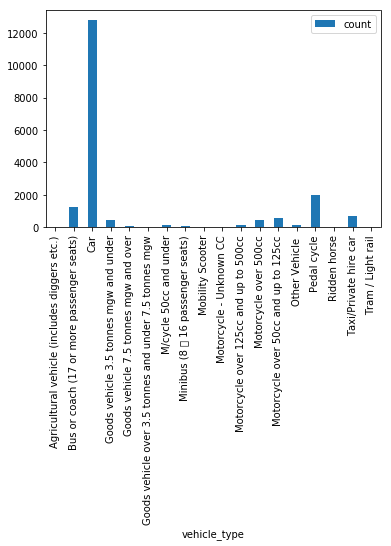

In [20]:
colsToExplore = ['road_class', 'road_surface', 'lighting', 'weather', 'vehicle_type']

for colte in colsToExplore:
    countByRoadClass = df.groupby(colte)[colte].agg(['count'])
    countByRoadClass.plot.bar()

In [21]:
def one_hot_encode_value(value, target):
    return int(value == target)

def pythonify(category_name, field_name):
    return category_name + '_is_' + field_name.lower().replace(' ','_')

def one_hot_encode_column(df, column_name, options):
    for option in options:
        new_column = pythonify(column_name, option)
        df[new_column] = [one_hot_encode_value(s, option) for s in df[column_name]]
    return df

In [22]:
# road surface - want to replace with binary is_dry

def encode_surface(s):
    return int(s == 'Dry')

df['is_dry'] = [encode_surface(s) for s in df.road_surface]
df = df.drop(columns = ['road_surface'])
df.head(10)

,num_vehicles,road_class,lighting,weather,casualty_class,casualty_age,vehicle_type,is_male,is_serious,weekday,hour,is_dry
0,2,Unclassified,Darkness: no street lighting,Fine with high winds,Driver/Rider,30,Car,1,0,6,23,1
1,2,Unclassified,Darkness: no street lighting,Fine with high winds,Driver/Rider,20,Car,0,0,6,23,1
2,1,A(M),Darkness: no street lighting,Fine with high winds,Driver/Rider,29,Car,1,0,6,6,1
3,4,A(M),Darkness: no street lighting,Fine with high winds,Driver/Rider,17,Car,1,0,4,6,1
4,4,A(M),Darkness: no street lighting,Fine with high winds,Driver/Rider,53,Goods vehicle 3.5 tonnes mgw and under,1,0,4,6,1
5,1,Motorway,Darkness: no street lighting,Fine with high winds,Driver/Rider,39,Goods vehicle 3.5 tonnes mgw and under,1,0,1,1,1
6,2,A(M),Darkness: no street lighting,Fine with high winds,Driver/Rider,60,Goods vehicle 7.5 tonnes mgw and over,1,1,2,2,0
7,2,A(M),Darkness: no street lighting,Fine with high winds,Driver/Rider,41,Goods vehicle 7.5 tonnes mgw and over,1,1,2,2,0
8,1,Unclassified,Darkness: street lighting unknown,Fine with high winds,Driver/Rider,18,Car,1,0,6,21,1
9,2,Unclassified,Darkness: street lighting unknown,Fine with high winds,Driver/Rider,31,Pedal cycle,1,0,1,21,1


In [23]:
# want to one hot encode road class

df = one_hot_encode_column(df, 'road_class', set(df.road_class.values))
df = df.drop(columns = ['road_class'])
df.head(10)

,num_vehicles,lighting,weather,casualty_class,casualty_age,vehicle_type,is_male,is_serious,weekday,hour,is_dry,road_class_is_unclassified,road_class_is_a(m),road_class_is_motorway,road_class_is_a,road_class_is_b,road_class_is_c
0,2,Darkness: no street lighting,Fine with high winds,Driver/Rider,30,Car,1,0,6,23,1,1,0,0,0,0,0
1,2,Darkness: no street lighting,Fine with high winds,Driver/Rider,20,Car,0,0,6,23,1,1,0,0,0,0,0
2,1,Darkness: no street lighting,Fine with high winds,Driver/Rider,29,Car,1,0,6,6,1,0,1,0,0,0,0
3,4,Darkness: no street lighting,Fine with high winds,Driver/Rider,17,Car,1,0,4,6,1,0,1,0,0,0,0
4,4,Darkness: no street lighting,Fine with high winds,Driver/Rider,53,Goods vehicle 3.5 tonnes mgw and under,1,0,4,6,1,0,1,0,0,0,0
5,1,Darkness: no street lighting,Fine with high winds,Driver/Rider,39,Goods vehicle 3.5 tonnes mgw and under,1,0,1,1,1,0,0,1,0,0,0
6,2,Darkness: no street lighting,Fine with high winds,Driver/Rider,60,Goods vehicle 7.5 tonnes mgw and over,1,1,2,2,0,0,1,0,0,0,0
7,2,Darkness: no street lighting,Fine with high winds,Driver/Rider,41,Goods vehicle 7.5 tonnes mgw and over,1,1,2,2,0,0,1,0,0,0,0
8,1,Darkness: street lighting unknown,Fine with high winds,Driver/Rider,18,Car,1,0,6,21,1,1,0,0,0,0,0
9,2,Darkness: street lighting unknown,Fine with high winds,Driver/Rider,31,Pedal cycle,1,0,1,21,1,1,0,0,0,0,0


In [24]:
# vehicle type - lots of options, don't want to hot encode them all
# most common = Car, Pedal Cycle, Bus or coach, other

def encode_vehicle_as_string(s):
    if s == 'Car':
        return s
    elif s == 'Pedal cycle':
        return s
    elif s == 'Bus or coach (17 or more passenger seats)':
        return 'Bus or coach'
    else:
        return 'Other'
    
df['vehicle_type_reduced'] = [encode_vehicle_as_string(s) for s in df.vehicle_type]
df = one_hot_encode_column(df, 'vehicle_type_reduced', set(df.vehicle_type_reduced.values))
df = df.drop(columns = ['vehicle_type', 'vehicle_type_reduced'])
df.head(10)

,num_vehicles,lighting,weather,casualty_class,casualty_age,is_male,is_serious,weekday,hour,is_dry,road_class_is_unclassified,road_class_is_a(m),road_class_is_motorway,road_class_is_a,road_class_is_b,road_class_is_c,vehicle_type_reduced_is_bus_or_coach,vehicle_type_reduced_is_other,vehicle_type_reduced_is_car,vehicle_type_reduced_is_pedal_cycle
0,2,Darkness: no street lighting,Fine with high winds,Driver/Rider,30,1,0,6,23,1,1,0,0,0,0,0,0,0,1,0
1,2,Darkness: no street lighting,Fine with high winds,Driver/Rider,20,0,0,6,23,1,1,0,0,0,0,0,0,0,1,0
2,1,Darkness: no street lighting,Fine with high winds,Driver/Rider,29,1,0,6,6,1,0,1,0,0,0,0,0,0,1,0
3,4,Darkness: no street lighting,Fine with high winds,Driver/Rider,17,1,0,4,6,1,0,1,0,0,0,0,0,0,1,0
4,4,Darkness: no street lighting,Fine with high winds,Driver/Rider,53,1,0,4,6,1,0,1,0,0,0,0,0,1,0,0
5,1,Darkness: no street lighting,Fine with high winds,Driver/Rider,39,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0
6,2,Darkness: no street lighting,Fine with high winds,Driver/Rider,60,1,1,2,2,0,0,1,0,0,0,0,0,1,0,0
7,2,Darkness: no street lighting,Fine with high winds,Driver/Rider,41,1,1,2,2,0,0,1,0,0,0,0,0,1,0,0
8,1,Darkness: street lighting unknown,Fine with high winds,Driver/Rider,18,1,0,6,21,1,1,0,0,0,0,0,0,0,1,0
9,2,Darkness: street lighting unknown,Fine with high winds,Driver/Rider,31,1,0,1,21,1,1,0,0,0,0,0,0,0,0,1


In [25]:
# exploring weather more

weatherAll = df.groupby(['weather', 'is_serious'])['weather'].agg(['count'])

weatherOptions = set(df.weather.values)

x = []
y = []

for weatherType in weatherOptions:
    x.append(weatherType)
    subDf = weatherAll.loc[weatherType]
    slightVal = subDf.iloc[0]['count']
    seriousVal = subDf.iloc[1]['count']
    y.append(seriousVal/slightVal)

,num_vehicles,lighting,casualty_class,casualty_age,is_male,is_serious,weekday,hour,is_dry,road_class_is_unclassified,...,vehicle_type_reduced_is_pedal_cycle,weather_is_raining_with_high_winds,weather_is_snowing_with_high_winds,weather_is_unknown,weather_is_snowing_without_high_winds,weather_is_fine_without_high_winds,weather_is_fine_with_high_winds,weather_is_fog_or_mist__if_hazard,weather_is_other,weather_is_raining_without_high_winds
0,2,Darkness: no street lighting,Driver/Rider,30,1,0,6,23,1,1,...,0,0,0,0,0,0,1,0,0,0
1,2,Darkness: no street lighting,Driver/Rider,20,0,0,6,23,1,1,...,0,0,0,0,0,0,1,0,0,0
2,1,Darkness: no street lighting,Driver/Rider,29,1,0,6,6,1,0,...,0,0,0,0,0,0,1,0,0,0
3,4,Darkness: no street lighting,Driver/Rider,17,1,0,4,6,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,Darkness: no street lighting,Driver/Rider,53,1,0,4,6,1,0,...,0,0,0,0,0,0,1,0,0,0
5,1,Darkness: no street lighting,Driver/Rider,39,1,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
6,2,Darkness: no street lighting,Driver/Rider,60,1,1,2,2,0,0,...,0,0,0,0,0,0,1,0,0,0
7,2,Darkness: no street lighting,Driver/Rider,41,1,1,2,2,0,0,...,0,0,0,0,0,0,1,0,0,0
8,1,Darkness: street lighting unknown,Driver/Rider,18,1,0,6,21,1,1,...,0,0,0,0,0,0,1,0,0,0
9,2,Darkness: street lighting unknown,Driver/Rider,31,1,0,1,21,1,1,...,1,0,0,0,0,0,1,0,0,0


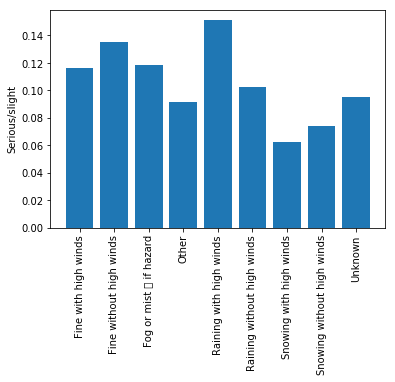

In [26]:
plt.bar(x,y)
plt.xticks(rotation=90)
plt.ylabel('Serious/slight')

# quite a lot of variation, not really tied to fine/raining or high winds
# so let's hot encode the lot

options = set(df.weather.values)
df = one_hot_encode_column(df, 'weather', options)
df = df.drop(columns=['weather'])
df.head(10)

In [27]:
# also want to one hot encode lighting

df = one_hot_encode_column(df, 'lighting', set(df.lighting.values))
df = df.drop(columns = ['lighting'])
df.head(10)

,num_vehicles,casualty_class,casualty_age,is_male,is_serious,weekday,hour,is_dry,road_class_is_unclassified,road_class_is_a(m),...,weather_is_fine_without_high_winds,weather_is_fine_with_high_winds,weather_is_fog_or_mist__if_hazard,weather_is_other,weather_is_raining_without_high_winds,lighting_is_darkness:_street_lights_present_and_lit,lighting_is_darkness:_street_lights_present_but_unlit,lighting_is_darkness:_no_street_lighting,lighting_is_daylight:_street_lights_present,lighting_is_darkness:_street_lighting_unknown
0,2,Driver/Rider,30,1,0,6,23,1,1,0,...,0,1,0,0,0,0,0,1,0,0
1,2,Driver/Rider,20,0,0,6,23,1,1,0,...,0,1,0,0,0,0,0,1,0,0
2,1,Driver/Rider,29,1,0,6,6,1,0,1,...,0,1,0,0,0,0,0,1,0,0
3,4,Driver/Rider,17,1,0,4,6,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,4,Driver/Rider,53,1,0,4,6,1,0,1,...,0,1,0,0,0,0,0,1,0,0
5,1,Driver/Rider,39,1,0,1,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
6,2,Driver/Rider,60,1,1,2,2,0,0,1,...,0,1,0,0,0,0,0,1,0,0
7,2,Driver/Rider,41,1,1,2,2,0,0,1,...,0,1,0,0,0,0,0,1,0,0
8,1,Driver/Rider,18,1,0,6,21,1,1,0,...,0,1,0,0,0,0,0,0,0,1
9,2,Driver/Rider,31,1,0,1,21,1,1,0,...,0,1,0,0,0,0,0,0,0,1


In [28]:
# and driver class

df = one_hot_encode_column(df, 'casualty_class', set(df.casualty_class.values))
df = df.drop(columns=['casualty_class'])
df.head(10)

,num_vehicles,casualty_age,is_male,is_serious,weekday,hour,is_dry,road_class_is_unclassified,road_class_is_a(m),road_class_is_motorway,...,weather_is_other,weather_is_raining_without_high_winds,lighting_is_darkness:_street_lights_present_and_lit,lighting_is_darkness:_street_lights_present_but_unlit,lighting_is_darkness:_no_street_lighting,lighting_is_daylight:_street_lights_present,lighting_is_darkness:_street_lighting_unknown,casualty_class_is_driver/rider,casualty_class_is_passenger,casualty_class_is_pedestrian
0,2,30,1,0,6,23,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,2,20,0,0,6,23,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,29,1,0,6,6,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,4,17,1,0,4,6,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,4,53,1,0,4,6,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
5,1,39,1,0,1,1,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
6,2,60,1,1,2,2,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
7,2,41,1,1,2,2,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
8,1,18,1,0,6,21,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
9,2,31,1,0,1,21,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [29]:
# and weekday from earlier?

df['weekday_string'] = [dayMap[wd] for wd in df.weekday]

df = one_hot_encode_column(df, 'weekday_string', set(df.weekday_string.values))
df = df.drop(columns=['weekday', 'weekday_string'])
df.head(10)

,num_vehicles,casualty_age,is_male,is_serious,hour,is_dry,road_class_is_unclassified,road_class_is_a(m),road_class_is_motorway,road_class_is_a,...,casualty_class_is_driver/rider,casualty_class_is_passenger,casualty_class_is_pedestrian,weekday_string_is_sat,weekday_string_is_wed,weekday_string_is_tue,weekday_string_is_sun,weekday_string_is_thu,weekday_string_is_mon,weekday_string_is_fri
0,2,30,1,0,23,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,2,20,0,0,23,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,29,1,0,6,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
3,4,17,1,0,6,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,4,53,1,0,6,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
5,1,39,1,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
6,2,60,1,1,2,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
7,2,41,1,1,2,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
8,1,18,1,0,21,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
9,2,31,1,0,21,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [31]:
outPath = "../data/ready.csv"
df.to_csv(outPath, index=False, header=True)